# 3.2 Assignment: Using Data to Improve MLB Attendance
# Rahul Rajeev

In [782]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [783]:
# load in dataset and preview
dodgers_df = pd.read_csv('dodgers.csv')
dodgers_df.head(10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


In [784]:
dodgers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


**Initial Thoughts:**

Looking at the attributes recorded, the only one I believe will not affect attendance is the day number. The attribute that more accurately can explain the number of people attending is the day of the week. At first, I didn't believe that the cap, shirt, and bobblehead attributes would correlated with the number of people attending, but then I did some research about it. Apparently, there are certain days scheduled around the season where merchandise including caps, shirts, and bobbleheads are given out (Cracknell, 2023). People are probably more inclined to come during these days to have a chance at free merch. And fireworks would probably be the cherry on top.

Month and day of the week definitely would affect people attending but it could be different because the baseball season is during the fall. The weather and time of day would also be a big factor, but most games in this dataset are held during cloudy or clear days.

There isn't any null values in the dataset, so no cleaning is required. We can create dummy variables for all the categorical variables to pass into a model. I think I will use logistic regression to find the correlation of the attributes with t

In [785]:
# dropping the day column
dodgers_df = dodgers_df.drop('day', axis=1)

## Visualizations

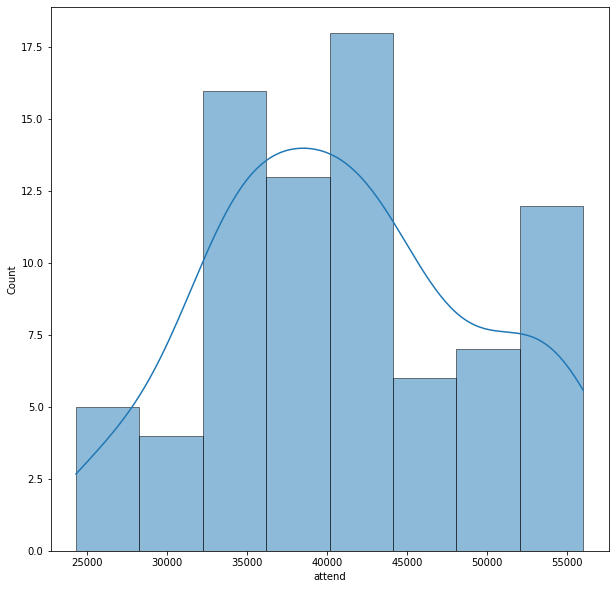

In [786]:
# histogram of people attending
plt.figure(figsize=(10,10))
sns.histplot(data = dodgers_df, x="attend", kde=True, edgecolor='black', linewidth=0.5)
plt.show()

In [787]:
print("Skewness: {:.3f}".format(dodgers_df['attend'].skew()))
print("Kurtosis: {:.3f}". format(dodgers_df['attend'].kurt()))

Skewness: 0.138
Kurtosis: -0.753


The data is fairly symmetrical and has a low kurtosis which implies that the data has light tails and a lack of outliers. 

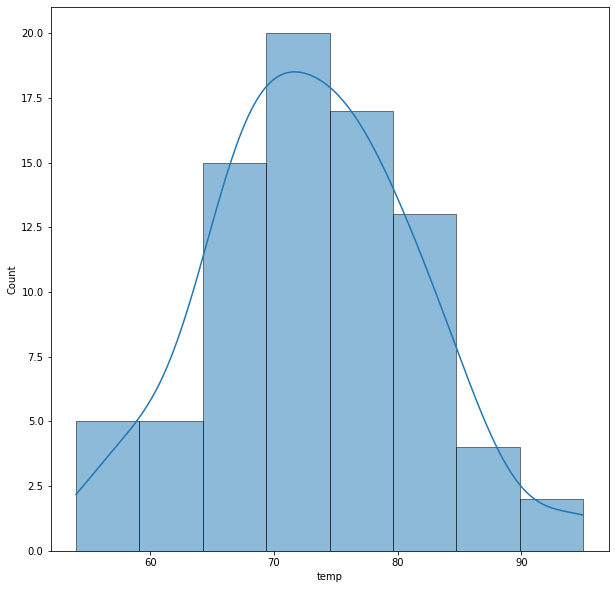

In [788]:
# histogram of temperatures, the only numerical feature in the dataset
plt.figure(figsize=(10,10))
sns.histplot(data = dodgers_df, x="temp", kde=True, edgecolor='black', linewidth=0.5)
plt.show()

In [789]:
print("Skewness: {:.3f}".format(dodgers_df['temp'].skew()))
print("Kurtosis: {:.3f}". format(dodgers_df['temp'].kurt()))

Skewness: 0.172
Kurtosis: 0.133


The data is fairly symmetrical and has a low kurtosis which implies that the data has light tails and a lack of outliers. 

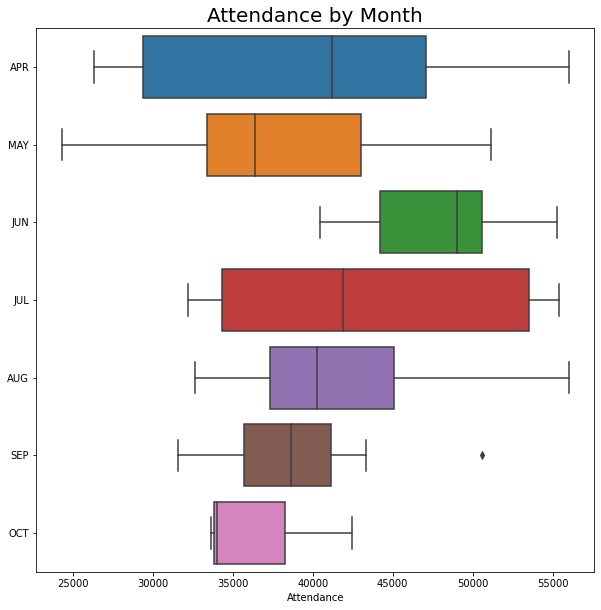

In [790]:
# boxplots of attendances by month
plt.figure(figsize=(10,10))
sns.boxplot(x='attend', y='month', data=dodgers_df)
plt.title('Attendance by Month', fontsize=20)
plt.xlabel('Attendance')
plt.ylabel('')
plt.show()

June has the tightest and highest distribution of attendance compared to the other months. July has a wider IQR but still has a distribution that reaches higher than the other months of the year. This makes complete sense because June/July are months of the summer and when most families can attend baseball games together at any time of the day.

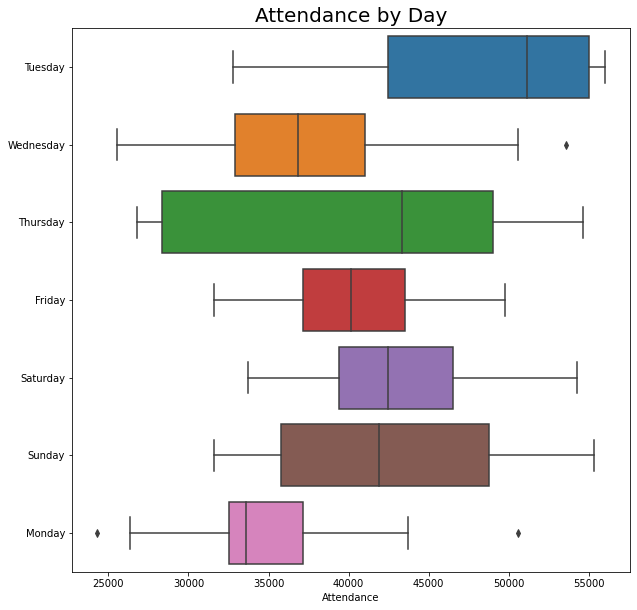

In [791]:
# boxplots of attendances by day of the week
plt.figure(figsize=(10,10))
sns.boxplot(x='attend', y='day_of_week', data=dodgers_df)
plt.title('Attendance by Day', fontsize=20)
plt.xlabel('Attendance')
plt.ylabel('')
plt.show()

Tuesday's and Thursdays have wide IQRs comapred to the other days of the week, with Tuesday having a majority of the values at high attendance. Wednesday and Monday are pretty low compared to the other days of the weekend: Friday, Saturday, and Sunday all of which have medians that are far greater than the two days. I would predict that the games being on Tuesday affect the attendance.

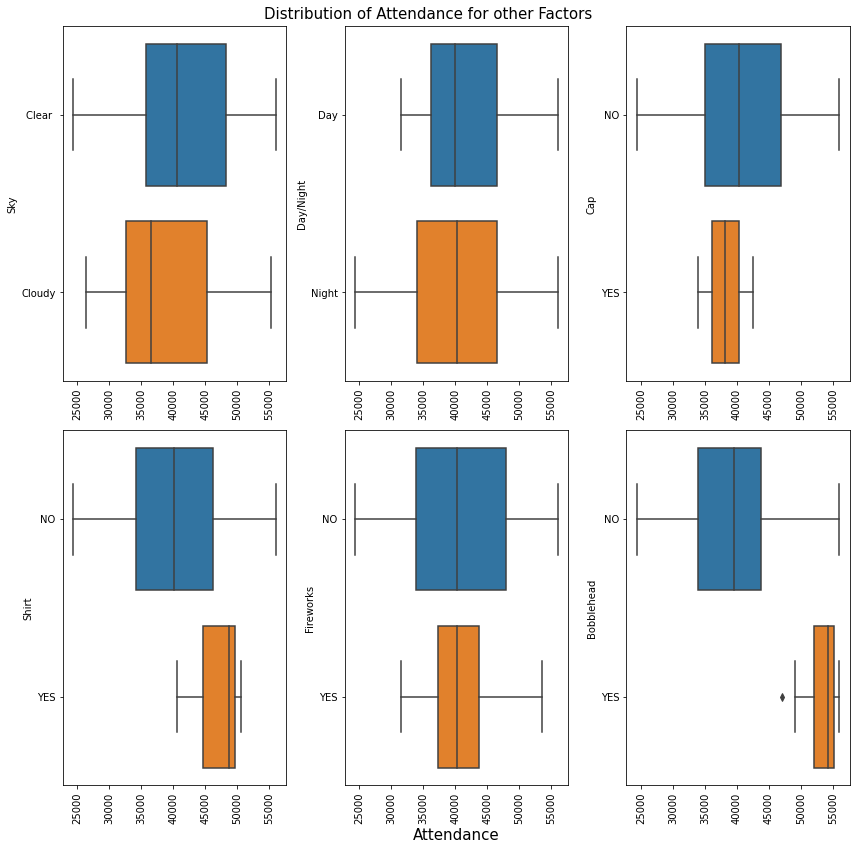

In [792]:
# boxplots of attendance vs the remaining features, most of which are binary categories
fig, axs = plt.subplots(2, 3, figsize=(12, 12))
fig.suptitle('Distribution of Attendance for other Factors', size=15)
sns.boxplot(x='attend', y='skies', data=dodgers_df, ax=axs[0,0])
axs[0][0].tick_params(axis='x', rotation=90)
axs[0][0].set_ylabel("Sky",fontsize=10)
axs[0][0].set(xlabel=None)
sns.boxplot(x='attend', y='day_night', data=dodgers_df, ax=axs[0,1])
axs[0][1].tick_params(axis='x', rotation=90)
axs[0][1].set_ylabel("Day/Night",fontsize=10)
axs[0][1].set(xlabel=None)
sns.boxplot(x='attend', y='cap', data=dodgers_df, ax = axs[0, 2])
axs[0][2].tick_params(axis='x', rotation=90)
axs[0][2].set_ylabel("Cap",fontsize=10)
axs[0][2].set(xlabel=None)
sns.boxplot(x='attend', y='shirt', data=dodgers_df, ax = axs[1,0])
axs[1][0].tick_params(axis='x', rotation=90)
axs[1][0].set_ylabel("Shirt",fontsize=10)
axs[1][0].set(xlabel=None)
sns.boxplot(x='attend', y='fireworks', data=dodgers_df, ax = axs[1,1])
axs[1][1].tick_params(axis='x', rotation=90)
axs[1][1].set_ylabel("Fireworks",fontsize=10)
axs[1][1].set_xlabel("Attendance",fontsize=15)
sns.boxplot(x='attend', y='bobblehead', data=dodgers_df, ax=axs[1,2])
axs[1][2].tick_params(axis='x', rotation=90)
axs[1][2].set_ylabel("Bobblehead",fontsize=10)
axs[1][2].set(xlabel=None)
plt.tight_layout()
plt.show()

Out of the remaining attributes, the ones that have a clear difference in the distribution of people attending are for when there are scheduled shirt and bobblehead giveaways. Shirts have a tigher and higher distribution of people attending compared to when there aren't, and bobbleheads distributions is also higher and completely over the majority of the distribution when there aren't any giveaways. People really appreciate these giveaways.

# Model Building

Since we are trying to predict attendance, a numerical quantity, I should use regression models. I also will transform the categorical columns into dummy columns for easier reading into the model. The three models I will try to use are linear regression, random forest regressor, and gradient boosing regressor. I haven't used the last two that much so I will try to figure out what exactly they do and what the results mean.

In [793]:
# libraries and functions for model building
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import time

In [794]:
# selecting categorical columns as dataframe to make into dummy columns
categorical_data = dodgers_df.select_dtypes(exclude=[np.number])

# dummy variables
dodgers_dum = pd.get_dummies(data=categorical_data)

# adding the remaining numerical column back
dodgers_dum['temp'] = dodgers_df['temp']

# result
dodgers_dum.head()

,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,...,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES,temp
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,67
1,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,58
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,0,57
3,1,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,1,1,0,54
4,1,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,1,0,1,0,57


In [795]:
# train test split for model
X = dodgers_dum
Y = dodgers_df['attend']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

### Linear Regression

In [796]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
linpred = linreg.predict(X_test)
print('R2 score:', r2_score(Y_test, linpred))

R2 score: 0.1263425669919086


In [797]:
results = linreg.coef_

In [798]:
results_df = pd.DataFrame(columns = ['var', 'coef'])
results_df['coef'] = results
results_df['var'] = dodgers_dum.columns
results_df

,var,coef
0,month_APR,1.297242e+16
1,month_AUG,1.297242e+16
2,month_JUL,1.297242e+16
3,month_JUN,1.297242e+16
4,month_MAY,1.297242e+16
5,month_OCT,1.297242e+16
6,month_SEP,1.297242e+16
7,day_of_week_Friday,-1.484148e+04
8,day_of_week_Monday,-1.179203e+03
9,day_of_week_Saturday,1.967328e+03


Well it doesn't appear that linear regression is a good fit, so I will try random forest regression and gradient boosting regression. I would probably state that linear regression wouldn't be a great fit or any other regression involving one curve would suffice because of the number of entries and how random the points could be compared to others. In that case, I probably would have to try using random forest regression or gradient boosting regression, both of which are not dependent on one curve.

In [799]:
# helper functions that keep track of results, cross validate, and plot residual graphs
def evaluate(model):        
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    model_score = r2_score(Y_test, pred)
    
    s = cross_val_score(model, X, Y, cv=5, scoring='r2', n_jobs=-1)
        
    print("R^2 score:", model_score)
    print("Cross Validation Score: {:0.5} ± {:0.5}".format(s.mean().round(5), s.std().round(5)))
    print("RMSE:", mean_squared_error(Y_test, pred)**.5)
    
    pred_res_df = pd.DataFrame(columns=['attendance', 'predictions', 'residuals'])
    pred_res_df['attendance'] = Y
    pred_res_df['predictions'] = model.predict(X)
    pred_res_df['residuals'] = pred_res_df['attendance'] - pred_res_df['predictions']
    pred_res_df.plot(x='predictions', y='residuals', kind='scatter')
    plt.show()

# shows the feature importance of the dataframe, which one has the most effect on the outcome
def feat_imp(model):
    feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']
                                      ).sort_values('importance', ascending=False).reset_index()
    return feature_importances

### Random Forest Regression

In [800]:
rf = RandomForestRegressor(n_estimators=300)

R^2 score: 0.2686564538199706
Cross Validation Score: 0.25529 ± 0.30113
RMSE: 6971.596271691261


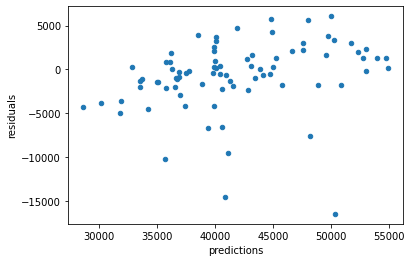

Wall time: 882 ms


In [801]:
%time evaluate(rf)

The R2 score, cross validation score, and rmse being high could be attributed to having a poor fitting model as well as not having enough entries to get a better understanding. I would assume that having a larger dataset would be easier to find a pattern, and therefore, have a better fitting model.

In [802]:
feat_imp(rf)

,index,importance
0,temp,0.120418
1,bobblehead_YES,0.116074
2,bobblehead_NO,0.110995
3,day_of_week_Tuesday,0.101746
4,day_of_week_Monday,0.085045
5,month_JUN,0.064737
6,month_MAY,0.047730
7,opponent_Pirates,0.033737
8,opponent_Snakes,0.033639
9,day_of_week_Thursday,0.024988


The top three features of importance are involving the bobble-head, the temperature, and the day of the week being tuesday. Let's try a grid search to tune hyperparameters and see whether I can find better results.

In [803]:
# doing a grid search for the best params
def rf_gs():
    params = {
        'max_features' : [0.5, 0.75, 'auto', 'sqrt'],
        'max_depth' : [20, 30, None],
    }

    gs_rf = GridSearchCV(rf, params, n_jobs=-1, cv=5)
    gs_rf.fit(X_train, Y_train)

    print(gs_rf.best_params_)

In [804]:
%time rf_gs()

{'max_depth': None, 'max_features': 'sqrt'}
Wall time: 2.74 s


In [805]:
# creating optimal rf model
rf2 = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=20)

R^2 score: 0.4669223593211327
Cross Validation Score: 0.25059 ± 0.31839
RMSE: 5952.052398086964


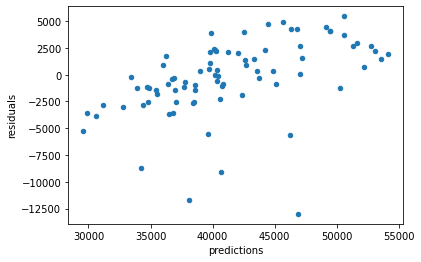

Wall time: 828 ms


In [806]:
%time evaluate(rf2)

All of the accuracy/score metrics have improved, so this is a good sign that this might be an ok model temporarily for this small dataset.

In [807]:
feat_imp(rf2)

,index,importance
0,temp,0.107412
1,bobblehead_YES,0.099922
2,bobblehead_NO,0.089747
3,day_of_week_Tuesday,0.084486
4,day_of_week_Monday,0.073385
5,month_MAY,0.047746
6,month_JUN,0.036371
7,opponent_Snakes,0.032047
8,opponent_Pirates,0.027094
9,day_of_week_Thursday,0.021772


The top three features are the same as the untuned model, with bobblehead, temp, and the day of the week being Tuesday being features of importance.

### GradientBoostingRegressor

R^2 score: 0.09530782651430192
Cross Validation Score: 0.10344 ± 0.38105
RMSE: 7753.930945287865


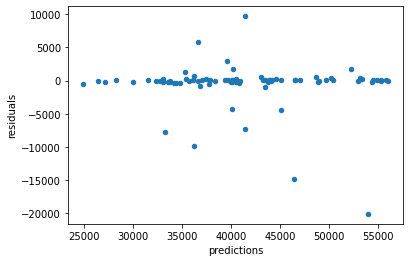

Wall time: 381 ms


In [808]:
gbr = GradientBoostingRegressor(n_estimators=300)
%time evaluate(gbr)

In retrospect, gradient boosting might be overfitting the model, since the R2 score is much lower, and the cross validation score also shows that. The RMSE has also increased from the hypertuned RF model.

In [809]:
feat_imp(gbr)

,index,importance
0,bobblehead_NO,0.162559
1,temp,0.118569
2,bobblehead_YES,0.096507
3,day_of_week_Monday,0.089189
4,month_MAY,0.073715
5,day_of_week_Tuesday,0.060064
6,month_JUN,0.058593
7,opponent_Snakes,0.040838
8,day_of_week_Thursday,0.029744
9,opponent_Pirates,0.027865


Interestingly enough, with bobblehead YES/NO still being very important in the model, the day of the week being monday seemed to have some sway in this untuned model. Let's hypertune and see whether the data still shows similar trends as I have seen before.

In [810]:
# grid searching for gbr
def gbr_gs():
    params = {
        'max_features' : [0.5, 0.75, 'auto', 'sqrt'],
        'max_depth' : [5, 8, 10, 15],
    }

    gs_gbr = GridSearchCV(gbr, params, n_jobs=-1, cv=5)
    gs_gbr.fit(X_train, Y_train)

    print(gs_gbr.best_params_)

In [811]:
%time gbr_gs()

{'max_depth': 8, 'max_features': 'sqrt'}
Wall time: 1.47 s


R^2 score: 0.32742066547014204
Cross Validation Score: 0.13349 ± 0.47878
RMSE: 6685.644378039859


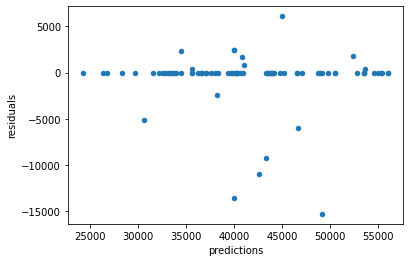

Wall time: 402 ms


In [812]:
# using optimal hyperparameters
gbr2 = GradientBoostingRegressor(n_estimators=300, max_depth=15, max_features='sqrt')
%time evaluate(gbr2)

Hypertuning the model did lead to improvement in the metrics, with the RMSE decreasing down to 6685. But still the best model by far has been the hypertuned RF model.

In [813]:
feat_imp(gbr2)

,index,importance
0,bobblehead_YES,0.123323
1,day_of_week_Monday,0.110211
2,bobblehead_NO,0.094653
3,temp,0.089773
4,month_JUN,0.055595
5,opponent_Pirates,0.048783
6,day_of_week_Tuesday,0.036594
7,month_MAY,0.036066
8,opponent_Snakes,0.033648
9,opponent_Brewers,0.021947


It seems that in GBR, the day of the week being Monday has greater sway over Tuesday. The features of bobblehead YES/NO and temperature are still up there.

**Conclusions:** 

While using three different regression models, I found the tuned random tree regressor to be the best fit for the data. It had the smallest RMSE of 5952. Using the feature_importances_ attributes of the RF model, I found that temperature, bobble_head_YES, bobble_head_no, and day_of_the_week_Tuesday were the top three important features. Reflecting upon the assumptions I had made earlier, the inclusion of bobble head giveaways and having games on Tuesdays seems to be two of the most affecting factors for attendance. Temperature was one I didn't particularly guess because I would think that people didn't really think about the temperature. But now considering the length of baseball games and the time of day, I think that temperature being an important feature makes a lot more sense.

On the other end, the sky conditions, the shirt and cap giveaways, the opponents, and the month don't have high importance. Sky conditions makes a bit sense considering most of the game happens on the ground. The shirt and cap giveaways could be unimportant if they aren't worth as much as the bobbleheads. The opponents not mattering makes sense as well, there probably is an even distribution of fans for each opponent team that come visit the game when their team visits. Lastly the month not mattering is also interesting because I would think the months of June or July would have some sway because families can bring children as well. Even having fireworks was a lot less important that I would've believed. 

The accuracies of the model were nothing to be proud of. However, I suspect that having only a small dataset led to a lot of model overfitting or difficulty in finding a trend at all in the data. The RMSE being close to 6000 even even in the best model while the attendances are between 30,000 and 50,000 people is pretty terrible considering that the attendance can be falsely predicted to almost a tenth of the people attending at max. Which is why I would be hesitant sharing the data to a professional team without further work and effort in building a better model. But for now, I can formulate a basic conclusion.


-
-
-
-





In short, if I were to present my results to the league, I would state that having bobblehead giveaways more often during games on Tuesdays would be preferrable. They should also keep an eye on the weather for scheduling a match during optimal temperatures. However, they should definitely take my results with a grain of salt as the models I have chosen are inaccurate with a smaller dataset.

**References:**

Cracknell, R. (2023, March 30). 2023 baseball bobblehead MLB stadium giveaways schedule. Beckett News.
https://www.beckett.com/news/2023-baseball-bobblehead-mlb-stadium-giveawaysguide/#:~:text=Share%3A,on%20the%20bobblehead%20giveaway%20action 
